# PHASE 1 : IMPORTATION DES LIBRAIRIES

Dans cette première étape, toutes les librairies nécessaires au projet sont chargées.
Elles couvrent plusieurs aspects essentiels du pipeline :

- Manipulation et analyse des données : pandas, numpy

- Visualisation : matplotlib, seaborn

- Préprocessing et évaluation des modèles : outils de scikit-learn

- Gestion du déséquilibre : techniques d’oversampling et undersampling (SMOTE, RandomUnderSampler)

- Construction de modèles deep learning : TensorFlow/Keras

- Stabilisation des résultats : fixation des graines aléatoires

- Gestion des avertissements et sauvegarde : warnings, joblib

Cette phase prépare l’environnement en rassemblant tous les outils indispensables pour le traitement des données, l’entraînement des modèles et l’analyse des performances.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour le préprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

# Pour le deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Pour gérer le déséquilibre de classes 
from sklearn.utils.class_weight import compute_class_weight



# Pour rendre les résultats reproductibles
np.random.seed(42)
tf.random.set_seed(42)

import warnings
warnings.filterwarnings("ignore")

print("Toutes les librairies sont chargées !")

Toutes les librairies sont chargées !


# PHASE 2 : CHARGEMENT ET EXPLORATION DU DATASET

Dans cette phase, le dataset est importé et examiné afin de mieux comprendre sa structure et son contenu.
L’objectif est de :

- Charger les données depuis leur source (CSV, base de données, etc.).

- Inspecter la forme du dataset (nombre de lignes, nombre de colonnes).

- Analyser la nature des variables (types, valeurs manquantes, distributions).

- Identifier d’éventuels déséquilibres dans les classes cibles.

- Repérer les premières tendances ou anomalies susceptibles d’influencer le prétraitement ou le choix des modèles.

Cette étape fournit une vision globale des données et sert de base pour les phases de nettoyage, de préparation et de modélisation qui suivront.

In [2]:
df = pd.read_excel("./data/features_spectrales_wide.xlsx")
df

,Blue_mean,Blue_std,Green_mean,Green_std,Red_mean,Red_std,RedEdge_mean,RedEdge_std,NIR_mean,NIR_std,...,PSRI_std,R_G_ratio_mean,R_G_ratio_std,R_B_ratio_mean,R_B_ratio_std,NIR_R_ratio_mean,NIR_R_ratio_std,NIR_RE_ratio_mean,NIR_RE_ratio_std,Class
0,5.049750,11.494329,6.873385,15.660865,4.709922,10.724893,19.693305,44.673463,28.070405,63.598188,...,1.359065e-02,1.129896e-01,2.571040e-01,1.539067e-01,3.509493e-01,9.850479e-01,2.238501e+00,2.341777e-01,5.303147e-01,rust
1,6.827409,12.361211,13.208132,26.172898,8.256663,16.444291,24.837587,48.990686,32.131113,63.357238,...,7.597836e+06,1.305014e-01,2.554845e-01,1.493722e+06,7.561720e+06,8.231455e-01,1.613128e+00,2.702942e-01,5.271131e-01,rust
2,6.733989,13.365646,10.433919,19.174772,3.671730,11.501103,14.286411,43.050169,17.822228,53.601367,...,9.676874e+06,2.131358e+05,2.400000e+06,1.092064e-01,3.447780e-01,5.293356e-01,1.601545e+00,1.288932e-01,3.814388e-01,rust
3,2.886800,8.715071,5.784840,17.582820,7.075233,13.125855,21.686084,44.753715,29.027078,59.872759,...,9.061835e+06,4.303958e+06,1.091977e+07,4.303958e+06,1.091977e+07,5.754035e+06,2.875528e+07,2.614470e-01,5.318636e-01,rust
4,5.170597,10.702552,7.788264,16.111091,5.125744,10.601593,27.965594,50.100625,40.026220,65.419336,...,4.468060e+05,1.284956e-01,2.631105e-01,1.934441e-01,3.962117e-01,1.385672e+07,4.247618e+07,5.423279e+06,2.743574e+07,rust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,4.546396,11.173057,5.514998,13.545459,4.165962,10.241337,17.447089,42.684337,26.370304,64.452830,...,1.322797e-02,1.092999e-01,2.686290e-01,1.326811e-01,3.261919e-01,9.209574e-01,2.263272e+00,2.181214e-01,5.335818e-01,norust
1117,2499.833392,2590.554710,3462.043188,3603.848903,2844.932221,2948.280428,8333.673260,8605.663823,12035.887867,12402.850530,...,3.397075e-02,4.041134e-01,4.217577e-01,5.577184e-01,5.807506e-01,2.076186e+00,2.155903e+00,7.060441e-01,7.301294e-01,norust
1118,6.083829,9.531910,11.040699,17.393365,8.911840,14.095961,24.068634,37.717264,29.343599,45.892508,...,5.936923e-02,2.368160e-01,3.728502e-01,4.300917e-01,6.818489e-01,9.765125e-01,1.539617e+00,3.574445e-01,5.592776e-01,norust
1119,1971.070862,2522.523496,3447.892560,4423.710245,2234.253095,2865.424694,7093.295831,9056.415159,8995.048850,11477.787126,...,2.861842e-02,2.491756e-01,3.207252e-01,4.352176e-01,5.603254e-01,1.550755e+00,1.992487e+00,4.857011e-01,6.211760e-01,norust


In [3]:
print("Dimension du dataset :", df.shape) 

Dimension du dataset : (1121, 31)


In [4]:
print("\nColonnes :")
print(df.columns.tolist())


Colonnes :
['Blue_mean', 'Blue_std', 'Green_mean', 'Green_std', 'Red_mean', 'Red_std', 'RedEdge_mean', 'RedEdge_std', 'NIR_mean', 'NIR_std', 'NDVI_mean', 'NDVI_std', 'GNDVI_mean', 'GNDVI_std', 'NDRE_mean', 'NDRE_std', 'SAVI_mean', 'SAVI_std', 'EVI_mean', 'EVI_std', 'PSRI_mean', 'PSRI_std', 'R_G_ratio_mean', 'R_G_ratio_std', 'R_B_ratio_mean', 'R_B_ratio_std', 'NIR_R_ratio_mean', 'NIR_R_ratio_std', 'NIR_RE_ratio_mean', 'NIR_RE_ratio_std', 'Class']


In [5]:
print("\nRépartition des classes :\n")
print(df['Class'].value_counts())


Répartition des classes :

Class
rust      848
norust    273
Name: count, dtype: int64


In [6]:
print("Valeurs manquantes ?")
print(df.isnull().sum().sum())

Valeurs manquantes ?
102


In [7]:
df = df.dropna().reset_index(drop=True)

# PHASE 4 : SEPARATION FEATURES ET TARGET / ENCODAGE DES CLASSES

Dans cette étape, le dataset est préparé pour l’entraînement des modèles.
Elle consiste à :

- Séparer les features (X), c’est-à-dire les variables explicatives,
et la target (y), la variable à prédire.

- Encoder la variable cible, lorsqu’elle est catégorielle, afin de la convertir en un format numérique compatible avec les algorithmes de machine learning.

- Garantir que les données sont prêtes pour les étapes suivantes, notamment le split train/test et le prétraitement.

Cette phase permet de structurer correctement les données et d’assurer la cohérence du pipeline d’apprentissage.

In [8]:
# Features
X = df.drop('Class', axis=1)

# Target
y = df['Class']

# Encodage des classes en nombres
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Classes détectées :", label_encoder.classes_)
print("Nombre de classes :", len(label_encoder.classes_))

classes_names = label_encoder.classes_
n_classes = len(classes_names)

Classes détectées : ['norust' 'rust']
Nombre de classes : 2


# PHASE 5 : DIVISION TRAIN / TEST

Dans cette phase, le dataset est séparé en deux sous-ensembles distincts :

- Ensemble d’entraînement (train) : utilisé pour apprendre les modèles.

- Ensemble de test (test) : utilisé uniquement pour évaluer les performances finales sur des données jamais vues.

Cette séparation permet de mesurer la capacité du modèle à généraliser, en évitant tout surapprentissage.
Une division stratifiée est souvent utilisée lorsque la target est déséquilibrée afin de conserver la même proportion de classes dans les deux ensembles.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,           # 20% pour le test 
    random_state=42,
    stratify=y_encoded       # Garde les mêmes proportions de classes dans train et test
)

print(f"Train : {X_train.shape} : {len(y_train)} échantillons")
print(f"Test  : {X_test.shape} : {len(y_test)} échantillons")

Train : (856, 30) : 856 échantillons
Test  : (214, 30) : 214 échantillons


# PHASE 6 : STANDARDISATION

Cette étape consiste à mettre toutes les features sur la même échelle en appliquant une standardisation.
Elle transforme chaque variable pour qu’elle ait :

- une moyenne de 0,

- un écart-type de 1.

Cette normalisation est essentielle pour de nombreux algorithmes (réseaux de neurones, SVM, méthodes basées sur les distances…), car elle améliore la stabilité de l’entraînement, accélère la convergence et évite que certaines features dominent les autres simplement par leur amplitude.

In [10]:
scaler = StandardScaler()

# On entraîne le scaler SUR LE TRAIN SEUL (jamais sur les données du test !)
X_train_scaled = scaler.fit_transform(X_train)

# On applique le même scaler au test
X_test_scaled = scaler.transform(X_test)

print("Données standardisées")

Données standardisées


In [11]:
X_train_scaled

array([[-0.34145041, -0.35972239, -0.33447297, ...,  5.15914259,
        10.8620868 ,  6.80787392],
       [ 2.71972138,  2.63470634, -0.31412492, ..., -0.21384922,
        -0.16193326, -0.18739866],
       [ 1.78609395,  2.51323717, -0.32702438, ..., -0.20165309,
        -0.16142932, -0.18224691],
       ...,
       [-0.33393175, -0.34801535, -0.32590523, ..., -0.18993873,
        -0.14718322, -0.15626882],
       [-0.3331427 , -0.34414051, -0.32668617, ..., -0.21384922,
        -0.16193326, -0.18739866],
       [ 4.23394961,  3.07510419, -0.31853806, ..., -0.21384922,
        -0.16193326, -0.18739866]])

In [12]:
X_test_scaled

array([[-0.3399333 , -0.35440626, -0.3331317 , ..., -0.19314041,
        -0.13901986, -0.1604372 ],
       [-0.3349937 , -0.34842579, -0.3311691 , ..., -0.18152409,
        -0.13444864, -0.14531353],
       [-0.33526273, -0.34822454, -0.32897034, ..., -0.21384922,
        -0.16193326, -0.18739866],
       ...,
       [-0.33046725, -0.34413358, -0.31502635, ..., -0.21384922,
        -0.16193326, -0.18739866],
       [-0.33450089, -0.34615389, -0.32627798, ..., -0.19889231,
        -0.15542117, -0.16792577],
       [-0.33464469, -0.34830845, -0.32937668, ..., -0.21384922,
        -0.16193326, -0.18739866]])

# PHASE 7 : CONSTRUCTION DU MODELE 

Dans cette étape, l’architecture du modèle d’apprentissage est définie.
Selon la nature du problème, cela inclut :

- Le choix du type de modèle (réseau de neurones, modèle classique, etc.).

- La définition des couches, du nombre de neurones, des fonctions d’activation et des techniques de régularisation (Dropout, Batch Normalization, L2…).

- Le choix de l’optimiseur (ex. Adam), du taux d’apprentissage et de la fonction de perte.

- La configuration des callbacks (EarlyStopping, ReduceLROnPlateau) pour stabiliser et optimiser l’entraînement.

Cette phase pose les fondations du système d’apprentissage et conditionne directement la qualité et la performance du modèle.

In [13]:
def create_model():
    model = Sequential([
        Dense(256, input_shape=(X_train_scaled.shape[1],), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


es = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True, verbose=1)
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-7, verbose=1)
callbacks = [es, rl]

# PHASE 8 : EVALUATION DU MODELE 

Dans cette phase, les performances du modèle entraîné sont mesurées sur l’ensemble de test.
L’objectif est de vérifier sa capacité à généraliser sur de nouvelles données.
Pour cela, plusieurs indicateurs sont analysés :

- Accuracy, pour évaluer la proportion globale de prédictions correctes.

- Precision, Recall et F1-score, pour mesurer la qualité de la classification, notamment en cas de déséquilibre des classes.

- Matrice de confusion, afin d’observer en détail les erreurs de classification.

- MCC (Matthews Correlation Coefficient), un indicateur robuste qui synthétise la performance globale.

Cette étape permet de déterminer si le modèle est fiable, d’identifier ses faiblesses et d’orienter d’éventuels ajustements ou améliorations.

In [14]:
def evaluer(model, X_test, y_test, nom_cas):
    # Prédictions brutes
    y_raw = model.predict(X_test, verbose=0)
    
    # Probabilité de classe positive (rust = 1)
    if y_raw.shape[1] == 2:        # Softmax
        y_proba = y_raw[:, 1]
        y_pred = np.argmax(y_raw, axis=1)
    else:                          # Sigmoïde
        y_proba = y_raw.ravel()
        y_pred = (y_proba > 0.5).astype(int)

    # Métriques standard
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    mcc = matthews_corrcoef(y_test, y_pred)

    # AUC ROC
    auc = roc_auc_score(y_test, y_proba)

    # Affichage des métriques
    print(f"\n{'='*30} {nom_cas} {'='*30}")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print(f"MCC       : {mcc:.4f}")
    print(f"AUC ROC   : {auc:.4f}")

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['nonrust','rust'],
                yticklabels=['nonrust','rust'])
    plt.title(f"Matrice de Confusion - {nom_cas}")
    plt.show()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], linestyle='--')  # Ligne aléatoire
    plt.xlabel("False Positive Rate (1 - Spécificité)")
    plt.ylabel("True Positive Rate (Rappel)")
    plt.title(f"Courbe ROC - {nom_cas}\nAUC = {auc:.4f}")
    plt.grid(True)
    plt.show()

    return [nom_cas, acc, prec, rec, f1, mcc, auc]

# PHASE 7 : GESTION DU DESEQUILIBRE DE CLASSES

Dans le domaine de l’apprentissage automatique, un déséquilibre de classes survient lorsqu’une classe (ou plusieurs) dans un jeu de données est beaucoup moins représentée que les autres. Par exemple, dans la détection de fraude, les transactions frauduleuses représentent souvent moins de 1 % des données. Les modèles standard ont tendance à favoriser la classe majoritaire, ce qui peut réduire la performance sur la classe minoritaire, souvent la plus critique.

### SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) est une méthode de suréchantillonnage synthétique. Plutôt que de dupliquer simplement les exemples minoritaires, SMOTE génère de nouveaux exemples synthétiques en interpolant entre les points existants de la classe minoritaire.

- Cas 1 : Equilibrage sur le train

Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 9.

============================== CAS 1: SMOTE sur train ==============================
Accuracy  : 0.9065
Precision : 0.8889
Recall    : 1.0000
F1-score  : 0.9412
MCC       : 0.7481
AUC ROC   : 0.8348


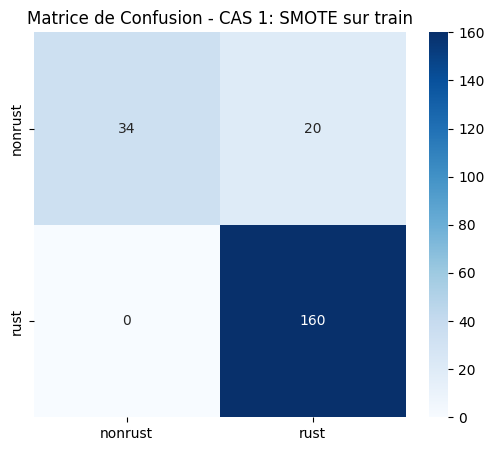

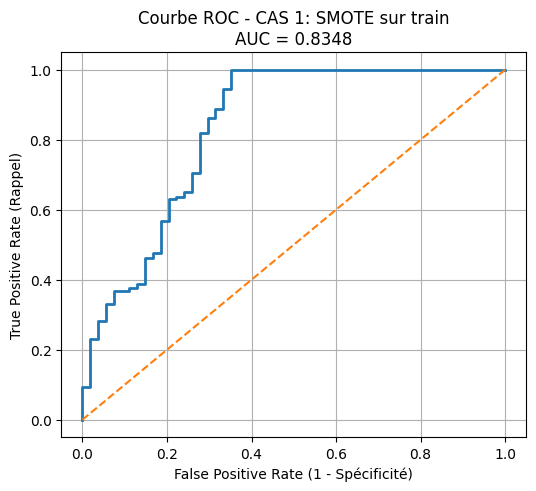

In [15]:
resultats = []

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

model1 = create_model()
model1.fit(X_train_smote, y_train_smote, epochs=200, batch_size=64, verbose=0, validation_data=(X_test_scaled, y_test), callbacks=callbacks)
resultats.append(evaluer(model1, X_test_scaled, y_test, "CAS 1: SMOTE sur train"))

Le modèle entraîné avec SMOTE uniquement sur le jeu d’entraînement (CAS 1) obtient de très bonnes performances globales avec une accuracy de 90,65 % et un AUC ROC de 0,8348. Il se montre particulièrement efficace pour détecter la classe minoritaire « rust » : il atteint un recall parfait de 100 % (aucun cas de rouille manqué) et identifie correctement les 160 échantillons positifs, ce qui est idéal lorsque rater un cas positif a un coût élevé. En revanche, il commet 20 faux positifs en classant à tort certains échantillons « nonrust » comme « rust », ce qui fait légèrement baisser la precision à 88,89 %. Ce comportement traduit un modèle volontairement prudent et « alarmiste » : il préfère déclencher une alerte inutile plutôt que de laisser passer un vrai cas de rouille. Globalement, c’est un excellent compromis si la priorité absolue est la détection exhaustive de la rouille, mais il reste possible d’améliorer la séparation des classes pour réduire les fausses alertes si nécessaire.

- Cas 2 : Equilibrage sur tout le dataset


Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 1.

============================== CAS 2 : SMOTE sur tout le dataset (leakage) ==============================
Accuracy  : 0.8832
Precision : 0.8814
Recall    : 0.9750
F1-score  : 0.9258
MCC       : 0.6732
AUC ROC   : 0.7603


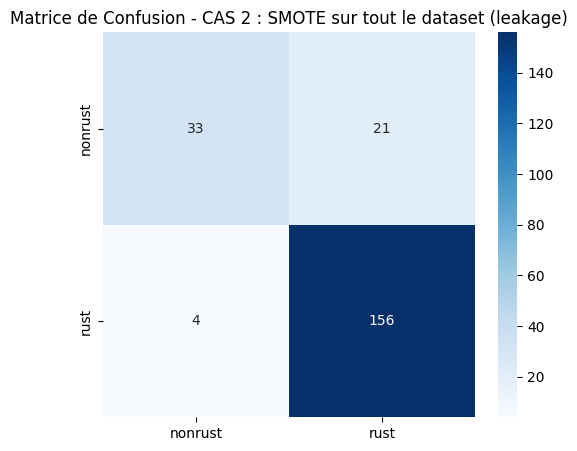

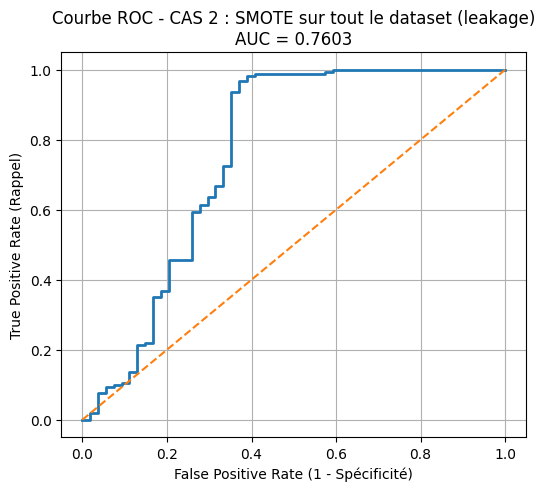

In [16]:
X_full = np.vstack((X_train_scaled, X_test_scaled))
y_full = np.concatenate((y_train, y_test))

X_full_smote, y_full_smote = SMOTE(random_state=42).fit_resample(X_full, y_full)

model2 = create_model()
model2.fit(X_full_smote, y_full_smote,
           epochs=200, batch_size=64, verbose=0,
           validation_data=(X_test_scaled, y_test), 
           callbacks=callbacks)
resultats.append(evaluer(model2, X_test_scaled, y_test, "CAS 2 : SMOTE sur tout le dataset (leakage)"))

Dans le CAS 2 (SMOTE appliqué sur l’ensemble du dataset, donc avec fuite de données – data leakage), les performances paraissent légèrement meilleures en apparence (accuracy 88,32 %, F1-score 0,9258), mais elles sont en réalité artificiellement gonflées et non fiables. La matrice de confusion révèle que le modèle manque 4 vrais cas de rouille (seulement 156 correctement détectés sur 160) tout en générant 21 faux positifs. Plus grave, l’AUC ROC chute fortement à 0,7603 (contre 0,8348 dans le cas 1), ce qui montre une réelle perte de capacité discriminative. Ce phénomène est classique lors d’un leakage : en créant des échantillons synthétiques à partir du test set et en les réinjectant dans l’entraînement, le modèle voit partiellement les données qu’il est censé prédire, ce qui biaise positivement les métriques d’accuracy et de F1 tout en masquant une dégradation réelle de la généralisation. En pratique, ce modèle serait moins robuste et moins fiable en production que le CAS 1. Ce graphique illustre parfaitement pourquoi il ne faut jamais appliquer SMOTE (ou tout autre ré-échantillonnage) sur l’ensemble du dataset avant la séparation train/test.

- Cas 3 : Pas d'équilibrage


Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 1.

============================== CAS 3 : Pas d'équilibrage ==============================
Accuracy  : 0.8879
Precision : 0.8820
Recall    : 0.9812
F1-score  : 0.9290
MCC       : 0.6878
AUC ROC   : 0.7826


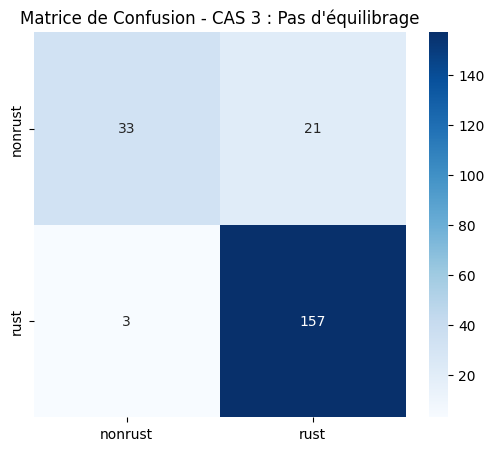

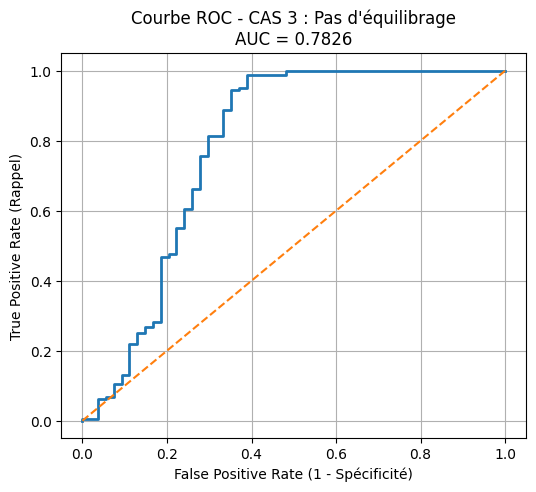

In [17]:
model3 = create_model()
model3.fit(X_train_scaled, y_train,
           epochs=200, batch_size=64, verbose=0,
           validation_data=(X_test_scaled, y_test),
           callbacks=callbacks)

resultats.append(evaluer(model3, X_test_scaled, y_test, "CAS 3 : Pas d'équilibrage"))

Dans le CAS 3 (aucun équilibrage des classes, entraînement brut sur le dataset déséquilibré), le modèle affiche une accuracy de 88,79 % qui semble correcte à première vue, mais elle est trompeuse. En réalité, il sacrifie fortement la détection de la classe minoritaire « rust » : il manque 3 vrais cas de rouille (157 détectés sur 160, recall de 98,12 %) et génère 21 faux positifs. L’AUC ROC de 0,7826 est la plus basse des trois cas, confirmant que la capacité discriminative du modèle est nettement moins bonne que dans le CAS 1 (SMOTE uniquement sur train).
Ce résultat illustre le biais classique des données déséquilibrées : sans aucune technique d’équilibrage, le modèle apprend à privilégier la classe majoritaire (« nonrust ») et devient moins sensible aux cas rares mais critiques de rouille. Comparé au CAS 1, on perd à la fois en recall parfait et en AUC, pour un gain négligeable en accuracy. Le CAS 3 est donc le moins performant des trois sur le critère qui compte vraiment ici : détecter un maximum de rouille avec le moins de fausses alertes possible. Il confirme que, dans ce contexte, laisser le dataset déséquilibré est la pire option.

In [18]:
df_final = pd.DataFrame(resultats, columns=[
    'Cas', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'MCC', 'AUC ROC'
]).round(4)

print("\n" + "="*100)
print("##########################################TABLEAU FINAL#######################################################")
print("="*100)
print(df_final.to_string(index=False))


##########################################TABLEAU FINAL#######################################################
                                        Cas  Accuracy  Precision  Recall  F1-score    MCC  AUC ROC
                     CAS 1: SMOTE sur train    0.9065     0.8889  1.0000    0.9412 0.7481   0.8348
CAS 2 : SMOTE sur tout le dataset (leakage)    0.8832     0.8814  0.9750    0.9258 0.6732   0.7603
                  CAS 3 : Pas d'équilibrage    0.8879     0.8820  0.9812    0.9290 0.6878   0.7826


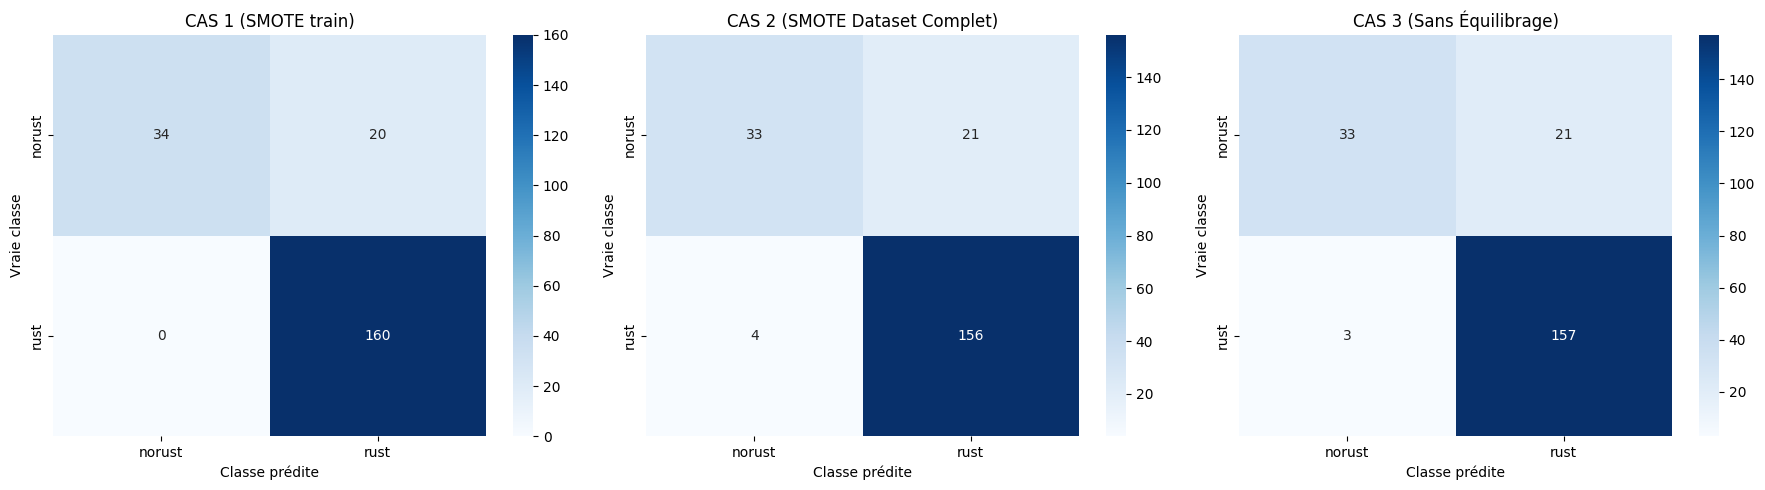

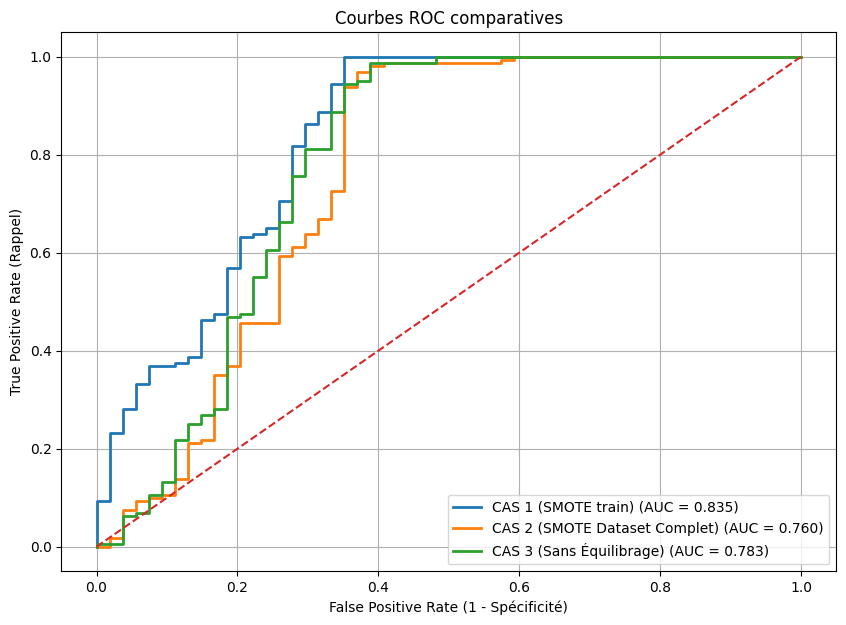

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cases = ["CAS 1 (SMOTE train)", "CAS 2 (SMOTE Dataset Complet)", "CAS 3 (Sans Équilibrage)"]
models = [model1, model2, model3]

# ========= MATRICES DE CONFUSION =========
for i, (mod, cas) in enumerate(zip(models, cases)):
    pred = np.argmax(mod.predict(X_test_scaled, verbose=0), axis=1)
    cm = confusion_matrix(y_test, pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=classes_names, yticklabels=classes_names)
    axes[i].set_title(cas)
    axes[i].set_ylabel("Vraie classe")
    axes[i].set_xlabel("Classe prédite")

plt.tight_layout()
plt.show()

# ========= COURBES ROC =========
plt.figure(figsize=(10, 7))

for mod, cas in zip(models, cases):

    # probabilités pour la classe 1 (rust)
    proba = mod.predict(X_test_scaled, verbose=0)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{cas} (AUC = {auc_score:.3f})", linewidth=2)

# ligne aléatoire
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel("False Positive Rate (1 - Spécificité)")
plt.ylabel("True Positive Rate (Rappel)")
plt.title("Courbes ROC comparatives")
plt.legend()
plt.grid(True)
plt.show()


## FEATURE IMPORTANCE SUR LE BON MODÈLE (CAS 1)

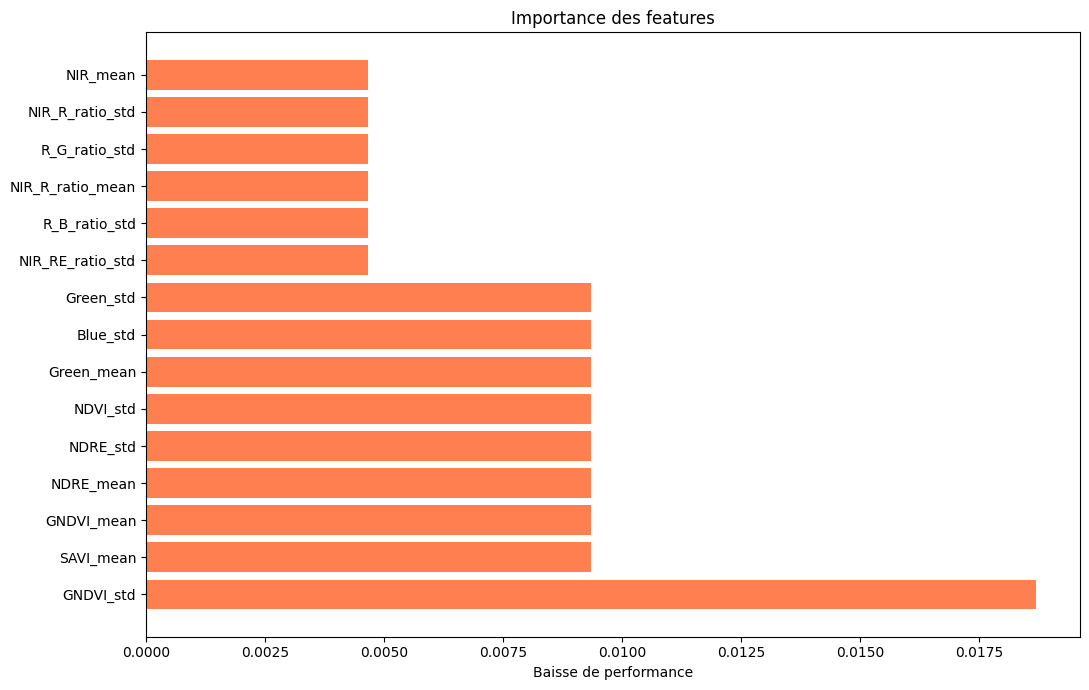

In [20]:
from sklearn.metrics import accuracy_score

baseline = accuracy_score(y_test, np.argmax(model1.predict(X_test_scaled, verbose=0), axis=1))
importances_simple = []

for i in range(X_test_scaled.shape[1]):
    X_permuted = X_test_scaled.copy()
    np.random.shuffle(X_permuted[:, i])  
    score_permuted = accuracy_score(y_test, np.argmax(model1.predict(X_permuted, verbose=0), axis=1))
    importances_simple.append(baseline - score_permuted)

importances_simple = np.array(importances_simple)
feat_names = df.drop('Class', axis=1).columns

# Graphique
plt.figure(figsize=(11,7))
idx = np.argsort(importances_simple)[::-1][:15]
plt.barh(range(15), importances_simple[idx][::-1], color='coral')
plt.yticks(range(15), feat_names[idx][::-1])
plt.title("Importance des features")
plt.xlabel("Baisse de performance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

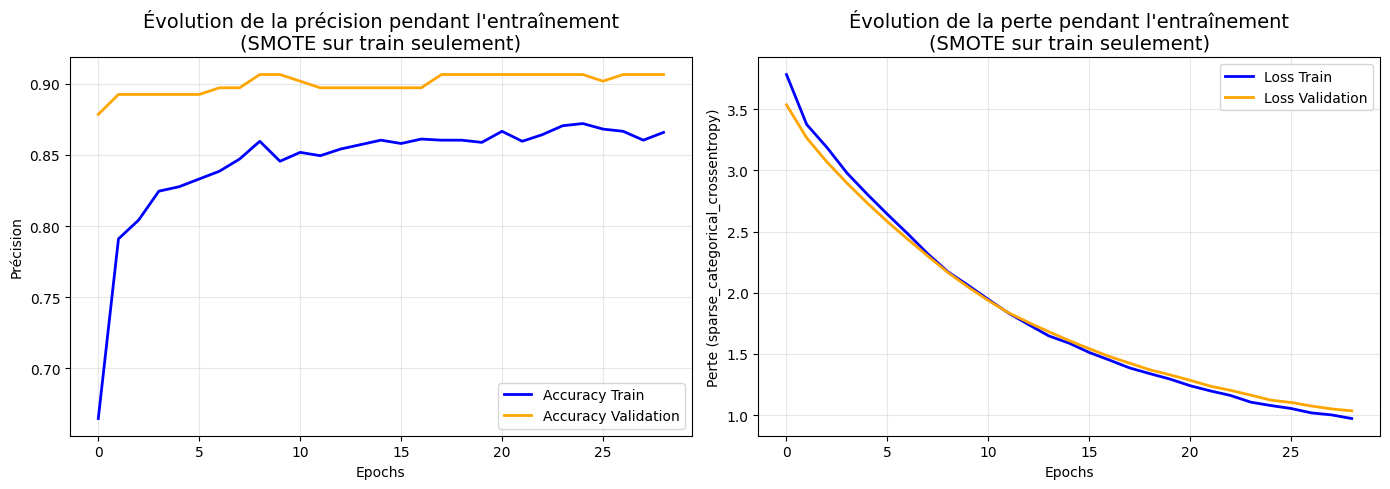

In [24]:
history1 = model1.history  # model1 est ton modèle du CAS 1

plt.figure(figsize=(14, 5))

# Courbe de précision
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Accuracy Train', color='blue', linewidth=2)
plt.plot(history1.history['val_accuracy'], label='Accuracy Validation', color='orange', linewidth=2)
plt.title('Évolution de la précision pendant l\'entraînement\n(SMOTE sur train seulement)', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()
plt.grid(True, alpha=0.3)

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Loss Train', color='blue', linewidth=2)
plt.plot(history1.history['val_loss'], label='Loss Validation', color='orange', linewidth=2)
plt.title('Évolution de la perte pendant l\'entraînement\n(SMOTE sur train seulement)', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Perte (sparse_categorical_crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
# Sauvegarde du modèle
model1.save('./data/models/MODELE_FINAL_RECOMMANDE_SMOTE_train_seulement.h5')

# Sauvegarde du scaler et de l'encodeur
import joblib
joblib.dump(scaler, './data/models/scaler.pkl')
joblib.dump(label_encoder, './data/models/label_encoder.pkl')

print("Modèle, scaler et encodeur sauvegardés !")

Modèle, scaler et encodeur sauvegardés !
